#  Students' Social Media Addiction & Its Impact on Academics
---

###  Project Objectives

> 1. **Identify which students are most impacted by social media addiction**  
> 2. **Determine which features best predict a student's addiction score**  
> 3. **Analyze how addiction may influence academic performance**


# Task 1: Load Libraies

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/social-media-addiction-vs-relationships/Students Social Media Addiction.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# Task 2: Load and Clean Data

In [3]:
# Load data
df = pd.read_csv('/kaggle/input/social-media-addiction-vs-relationships/Students Social Media Addiction.csv')
df.shape

(705, 13)

In [4]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [5]:
# Remove student_ID
df = df.drop('Student_ID', axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Academic_Level                705 non-null    object 
 3   Country                       705 non-null    object 
 4   Avg_Daily_Usage_Hours         705 non-null    float64
 5   Most_Used_Platform            705 non-null    object 
 6   Affects_Academic_Performance  705 non-null    object 
 7   Sleep_Hours_Per_Night         705 non-null    float64
 8   Mental_Health_Score           705 non-null    int64  
 9   Relationship_Status           705 non-null    object 
 10  Conflicts_Over_Social_Media   705 non-null    int64  
 11  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 66.2+ KB


In [7]:
df.isnull().sum()

Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

# Task 3: EDA

## Task 3.1: Univariate Analysis

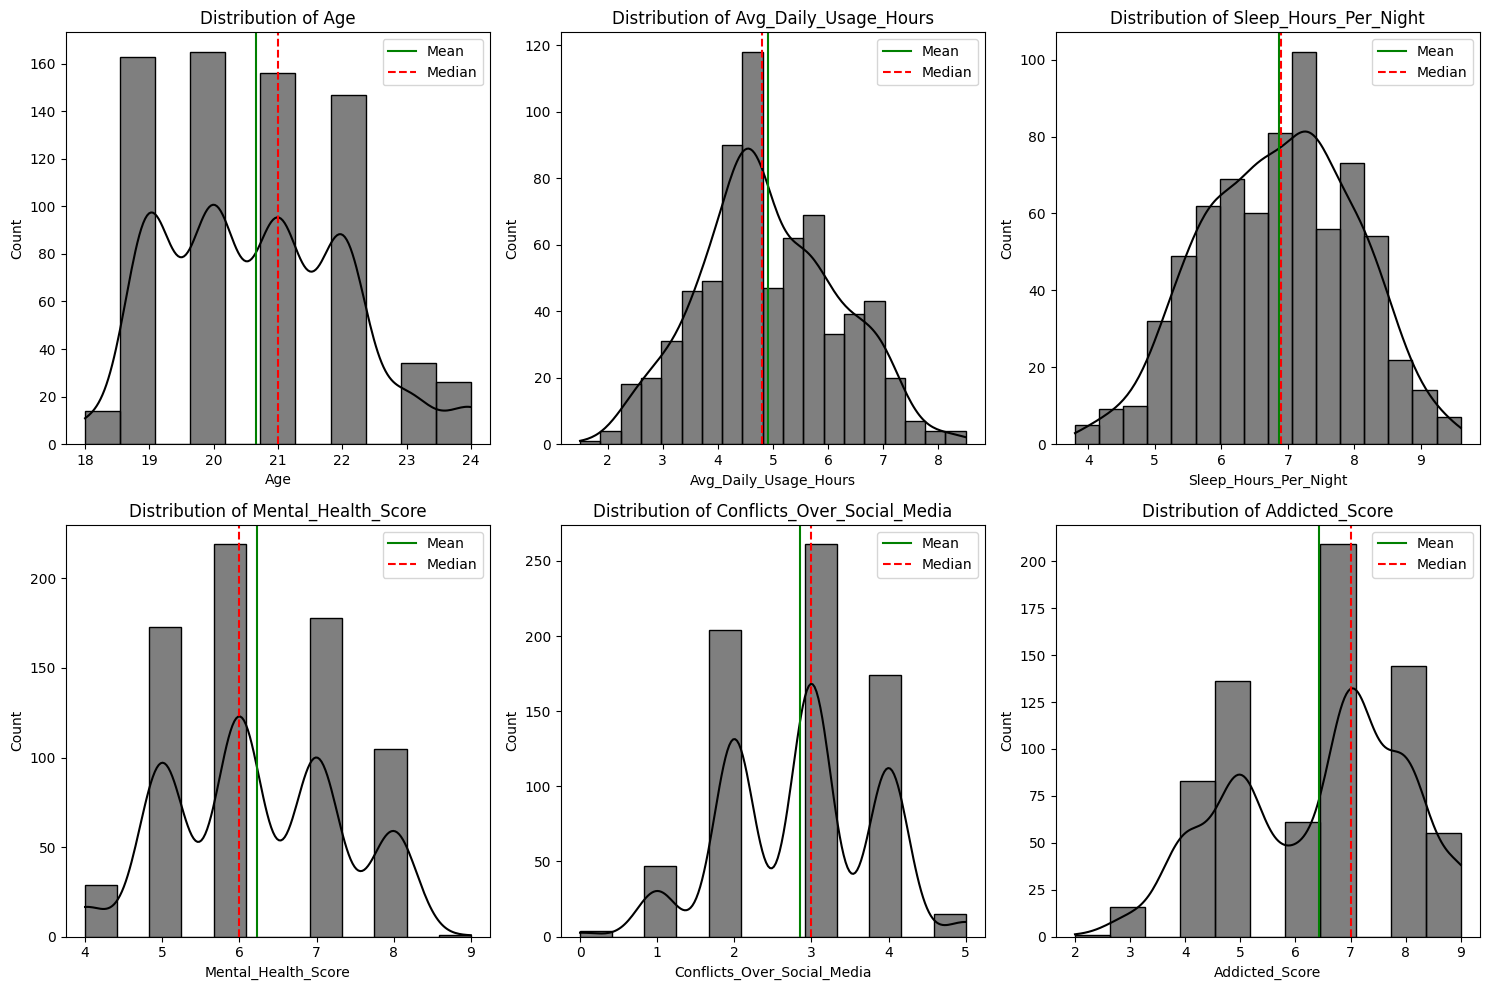

In [8]:
# Numerical Feature Analysis
num_features = df.select_dtypes(include=['int64', 'float64']).columns

# Plot distributions of data
plt.figure(figsize=(15,10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(x=feature, data=df, kde=True, color='black')
    plt.axvline(df[feature].mean(), color='green', linestyle='-', label='Mean')
    plt.axvline(df[feature].median(), color='red', linestyle='--', label='Median')
    plt.title(f'Distribution of {feature}')
    plt.legend()

plt.tight_layout()


### 📊 Insights Summary

---

###  **Age**
>  Primarily looking at the ages of **19 - 22**.

---

###  **Daily Use**
>  Normal distribution with the **mean around 5 hours**.

---

###  **Sleep**
>  Normal distribution of sleep with the **average student getting around 7 hours a night**.

---

###  **Mental Health**
>  Few values at the extremes, with most students scoring between **5 - 8**,  
> suggesting a **diverse mental health experience** within the data.

---

###  **Conflicts Over Social Media**
>  Few values at the extremes, with most students reporting **2 - 4 conflicts**,  
> suggesting that **most students experience some conflict** over social media.

---

###  **Addicted Score**
>  Appears to be **three distinct groups**, with the majority clustered around **6 - 7** — not surprising.  
> Very few students reported a **3 or lower**, suggesting **nearly all students experience some level of addiction**.

---


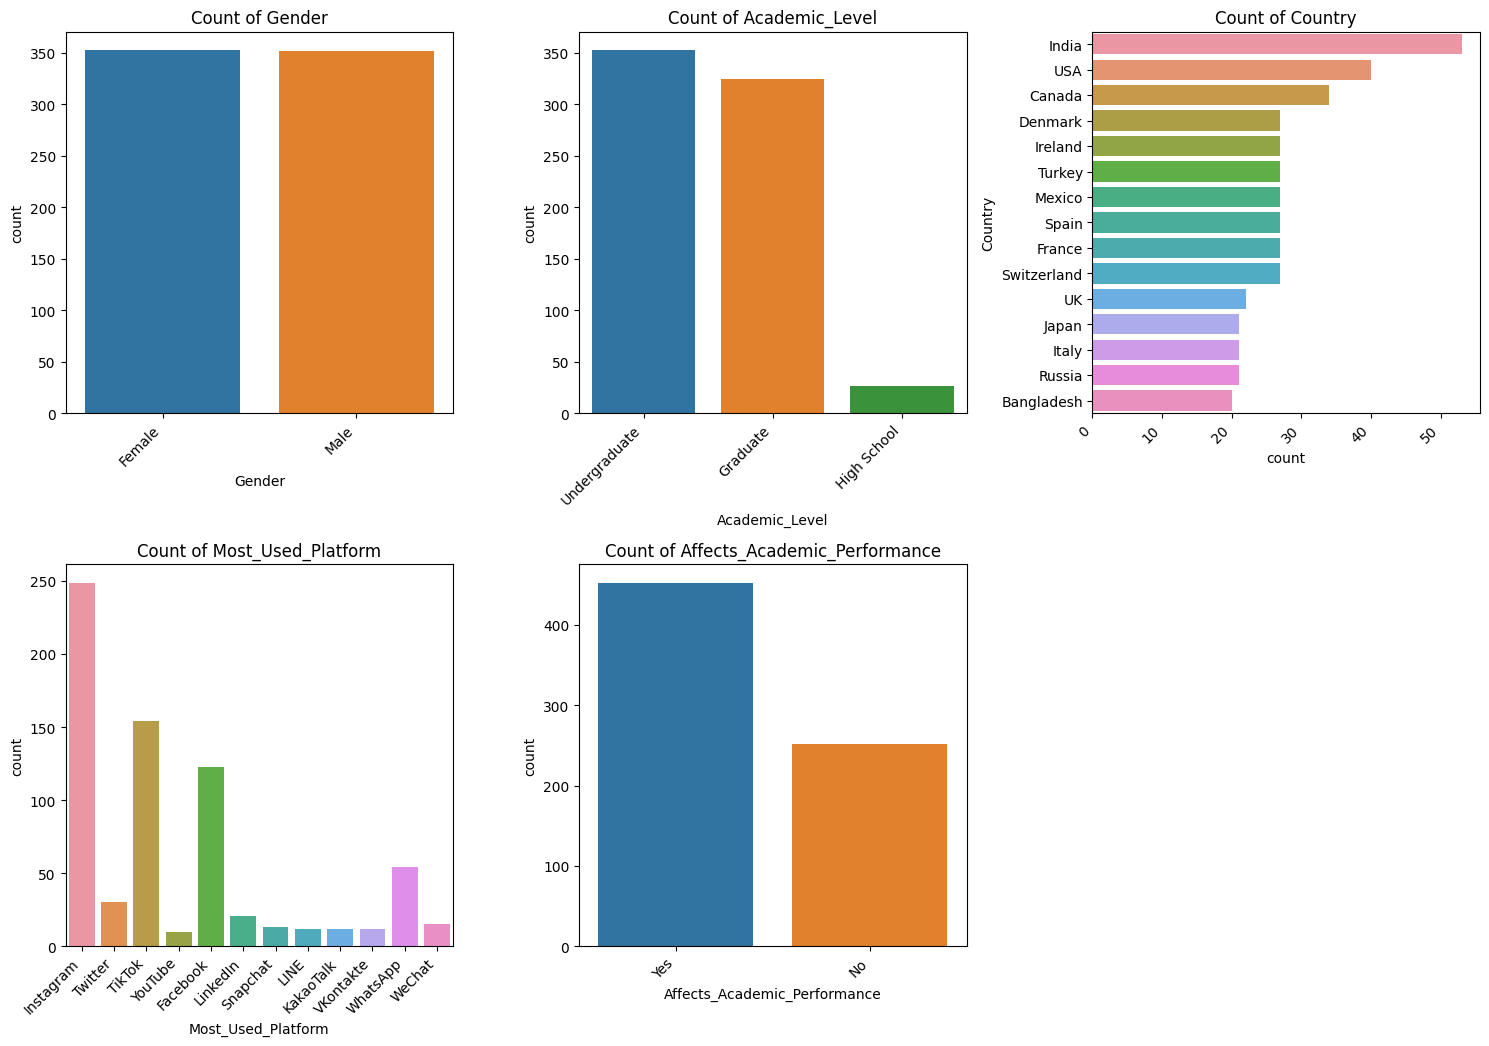

In [9]:
# Categircal Features
cat_features = df.select_dtypes(include='object').columns
cat_features = cat_features.drop('Relationship_Status')

# Plot countplots
plt.figure(figsize=(15,15))
for i, feature in enumerate(cat_features, 1):
    plt.subplot(3, 3, i)
    if feature == 'Country':
        value_counts = df[feature].value_counts().nlargest(15).index
        sns.countplot(data = df[df['Country'].isin(value_counts)], y = feature, order = value_counts)
    else:
        sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### 📊 Insights Summary

---

###  **Gender**
>  **Even** distribution of male and female.

---

###  **Academic Level**
>  **Primarily college level students** which correlates to our avergae age from earlier.

---

###  **Country**
>  Over 100 unique values so we limited it to show the top 15. This does not provide much insight.

---

###  **Most Used Platforms**
>  Majority use Instagram as their most used, with TikTok and Facebook being the other two main platforms.

---

###  **Affects Academic Performance**
> 64% of the students reported an impact on their academic performance.

---


## Taske 3.2: Multivariate Analysis

Text(0.5, 1.0, 'Correlation Matrix')

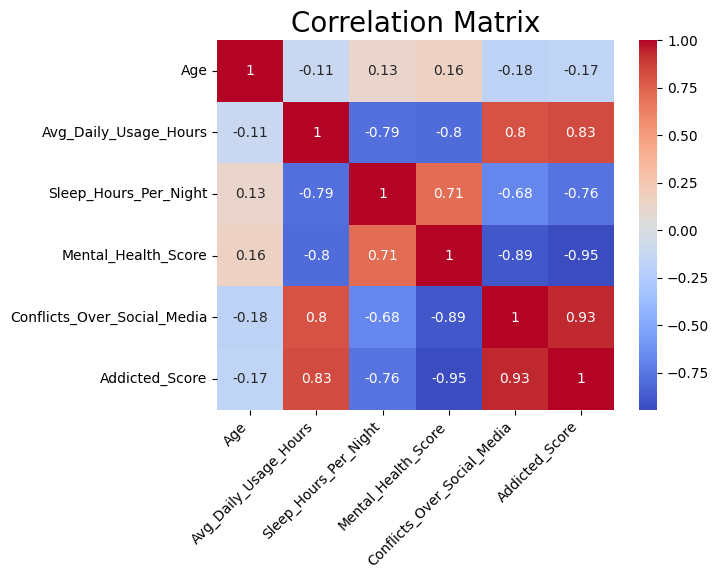

In [10]:
# Correlation Matrix
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Matrix', fontsize=20)

### 📊 Insights Summary
---
> Overall, the data shows that **higher social media usage and addiction are strongly linked to poorer mental health, more conflicts online, and less sleep**.
>These factors are closely interconnected, while age appears to have little influence on any of the key variables.

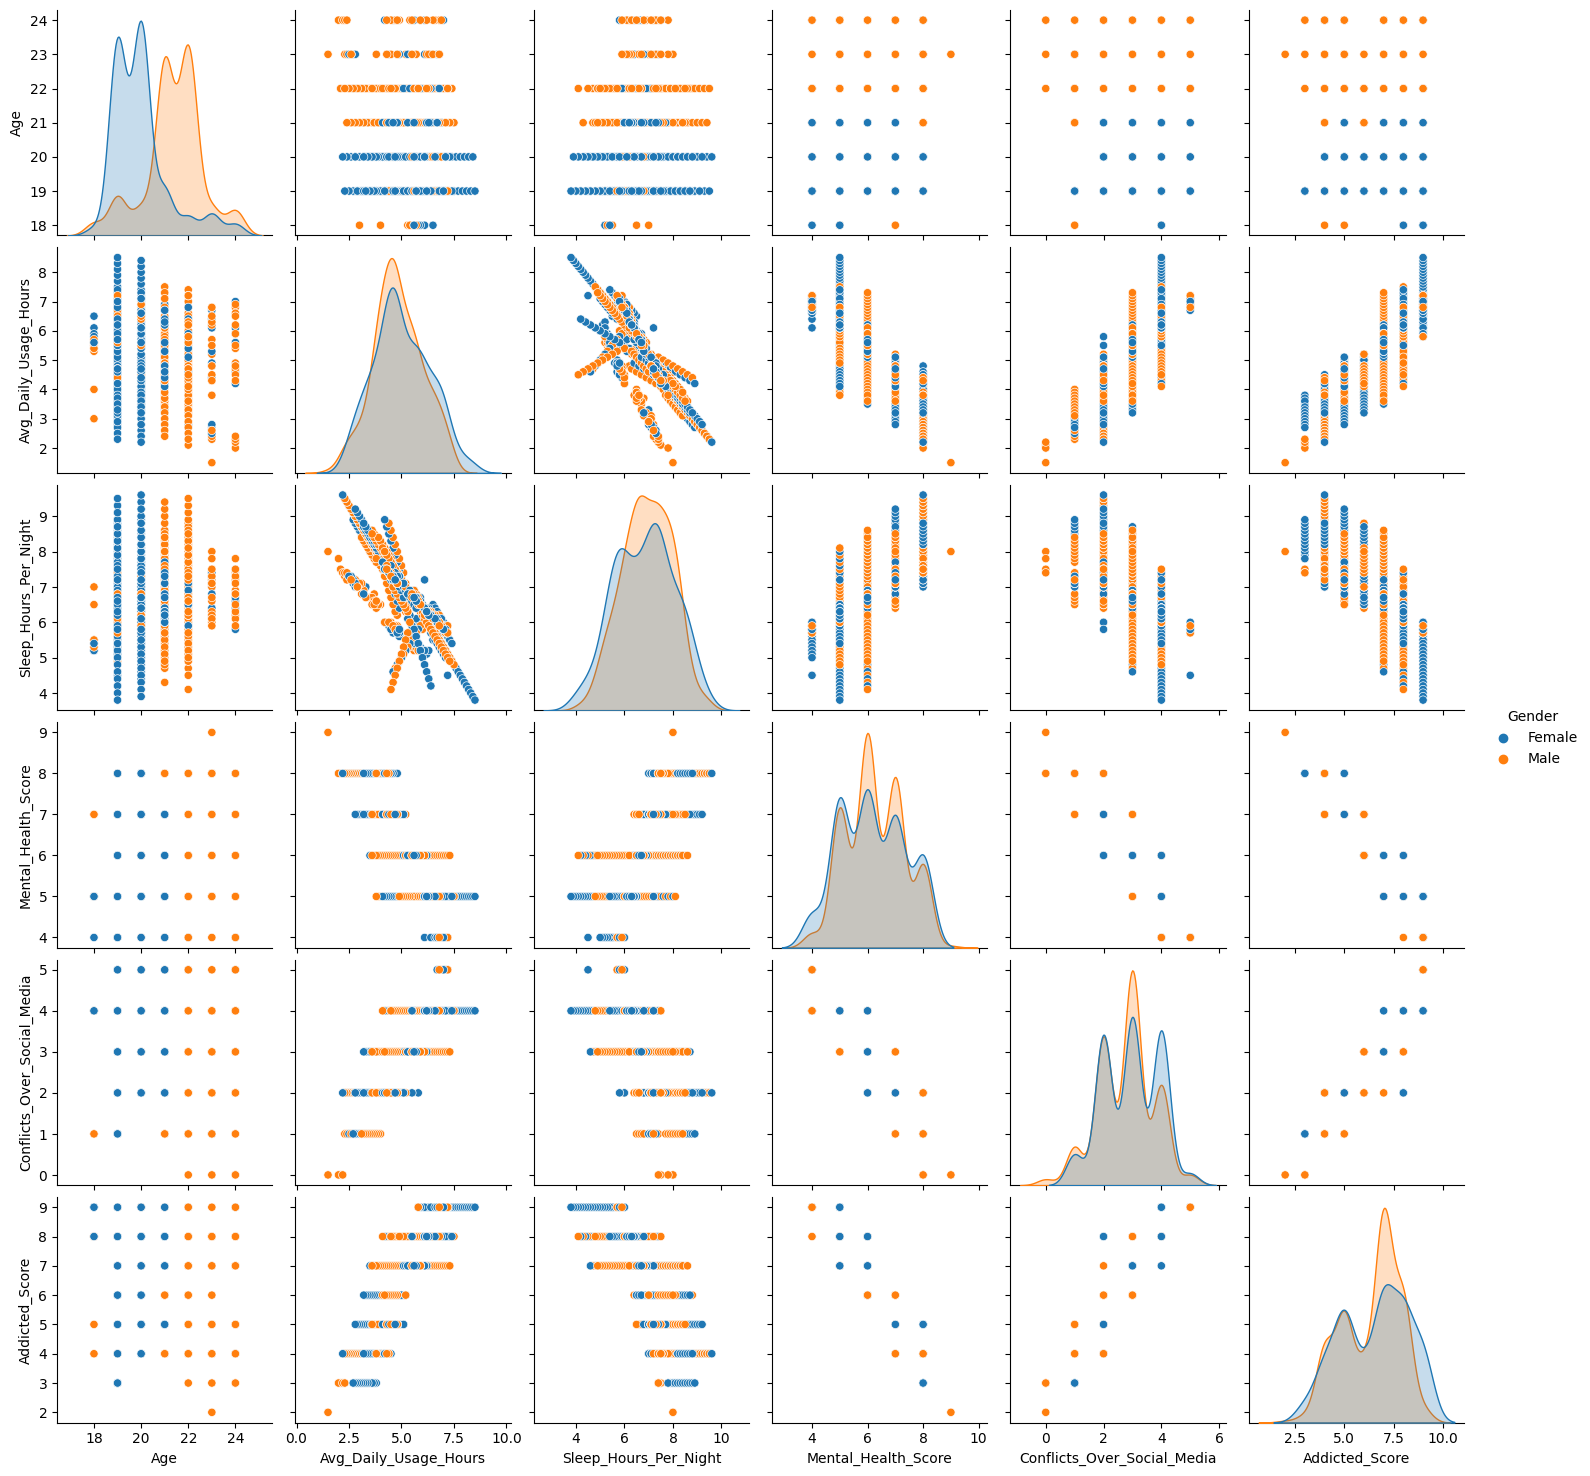

In [11]:
# Pairplot to visualize bivariate relations
sns.pairplot(df, diag_kind='kde', hue='Gender')

### 📊 Insight Summary
---
> There are clear negative relationships between screen time, addiction, and mental health, with stronger addiction and more usage correlating with less sleep and lower mental health scores. These trends appear consistent across both genders, though females show slightly higher screen usage and addiction scores on average. No major gender-based differences are observed in mental health or conflict patterns.

##  Final Reflection & Insights

---

###  Key Takeaways
- **Higher screen time and social media use** are strongly linked to:
  - Lower sleep duration  
  - Higher addiction scores  
  - Poorer mental health outcomes  
- **Sleep** appears to be a protective factor, positively associated with better mental health and lower addiction levels.

---

###  Surprising Findings
- The **correlation between addiction and mental health (-0.95)** was stronger than expected, suggesting that addiction scores may be a strong indicator of mental well-being in this group.
- **Conflicts over social media** were common, and highly correlated with both addiction and lower mental health scores.

---

###  Minimal Role of Age & Gender
- **Age** had little to no correlation with key variables.
- **Gender differences** were minimal — behavioral patterns and reported experiences were consistent between male and female students.

---

###  Final Insight
> **Digital behaviors, not demographics, drive well-being.**  
> The strongest patterns in this dataset highlight screen time, sleep, and social media conflict as core influences on mental health. Age and gender had minimal impact.
